In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [15]:
def adopted_user(df, days=7, logins=3):
    '''
    A method to see if a user logged in on 3 seperate days in a 7-day period
    '''
    from datetime import timedelta
    #dropping time, just need dates
    df['date'] = df['time_stamp'].dt.date
    
    #dropping duplicates (because there may be logins on the same date) and sorting
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    #how many days passed for every 3 logins
    days_between = df['date'].diff(periods=logins-1)
    
    #check if days between is less than 7, returns boolean for that user_id
    return any(days_between <= timedelta(days=days))

In [27]:
adopted = engagement.groupby('user_id').apply(adopted_user)
adopted.name = 'adopted_user'
print(f"There were {sum(adopted)} adopted useres out of {len(adopted)} total users")


There were 1656 adopted useres out of 8823 total users


In [21]:
users = pd.read_csv('takehome_users.csv')

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Many columsns are not needed, reloading with just the needed columns

In [25]:
cols = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
users = pd.read_csv('takehome_users.csv', usecols=cols)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


In [26]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [28]:
users.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
315      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

C:\Users\Aim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='org_id', ylabel='Density'>

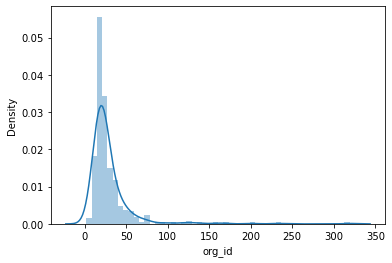

In [29]:
sns.distplot(users.org_id.value_counts())

In [30]:
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
11770.0    11
1525.0     11
2308.0     11
           ..
5592.0      1
5289.0      1
3288.0      1
4467.0      1
10872.0     1
Name: invited_by_user_id, Length: 2564, dtype: int64

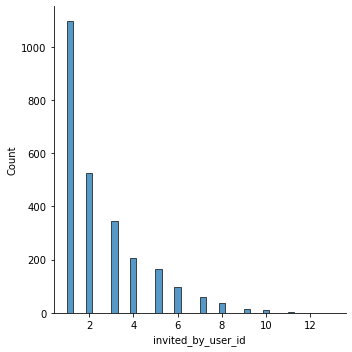

In [31]:
sns.displot(users.invited_by_user_id.value_counts())

I'm not going to drop any features, but will want to engineer:

    1. 'history' - how long they used software
    2. 'account age' - based on creation time

In [33]:
users['creation_time'] = pd.to_datetime(users.creation_time, 
                                        format='%Y-%m-%d %H:%M:%S')

#note how i'm stating unit=seconds for last session. This is so i can perform maths
users['last_session_creation_time'] = pd.to_datetime(users.last_session_creation_time,
                                                    unit='s')

#maths to engineer 'history' feature
users['history'] = users['last_session_creation_time'] - users['creation_time']
users['history'] = users['history'].dt.days

#using the latest creation date as a point of reference, and going back
#engineer account_age feature
latest = max(users['creation_time'])
users['account_age'] = latest-users['creation_time']
users['account_age'] = users['account_age'].dt.days

#dropping the two original features
users=users.drop(columns=['creation_time', 'last_session_creation_time'], axis=1)

In [34]:
users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
0,1,GUEST_INVITE,1,0,11,10803.0,0.0,38
1,2,ORG_INVITE,0,0,1,316.0,136.0,196
2,3,ORG_INVITE,0,0,94,1525.0,0.0,437
3,4,GUEST_INVITE,0,0,1,5151.0,1.0,374
4,5,GUEST_INVITE,0,0,193,5240.0,5.0,498


In [48]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          6417 non-null   float64
 6   history                     8823 non-null   float64
 7   account_age                 12000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 750.1+ KB


Out of 12000 observered users, only 8823 had history. There are around 3,200+ users with 0 as history, dropping them.

In [47]:
users.loc[users['history']>0, 'history'].describe()

count    5796.000000
mean       90.151311
std       169.865028
min         1.000000
25%         1.000000
50%         4.000000
75%        80.000000
max       729.000000
Name: history, dtype: float64

In [63]:
users=users.set_index('object_id', drop=True)
users.index.name='user_id'

In [64]:
users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
user_id,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0.0,38
2,ORG_INVITE,0,0,1,316.0,136.0,196
3,ORG_INVITE,0,0,94,1525.0,0.0,437
4,GUEST_INVITE,0,0,1,5151.0,1.0,374
5,GUEST_INVITE,0,0,193,5240.0,5.0,498
...,...,...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,8263.0,0.0,266
11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,5.0,505
11998,GUEST_INVITE,1,1,83,8074.0,0.0,33


In [65]:
#merging adopted and users
data = pd.concat([users, adopted], axis=1, join='inner')

#binarized what was teh boolean for adopted, easier for classification later
data['adopted_user'] = data['adopted_user'].astype(int)

In [66]:
data

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user
user_id,,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0.0,38,0
2,ORG_INVITE,0,0,1,316.0,136.0,196,1
3,ORG_INVITE,0,0,94,1525.0,0.0,437,0
4,GUEST_INVITE,0,0,1,5151.0,1.0,374,0
5,GUEST_INVITE,0,0,193,5240.0,5.0,498,0
...,...,...,...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,8263.0,0.0,266,0
11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,5.0,505,0
11998,GUEST_INVITE,1,1,83,8074.0,0.0,33,0


# EDA

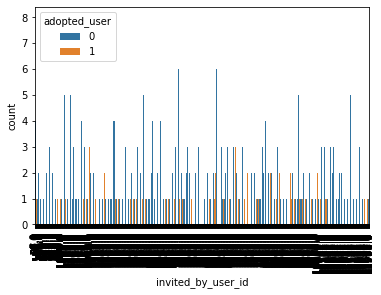

In [69]:
#first exploration, see if being invited by a user makes a difference in adopted
_ = sns.countplot(x='invited_by_user_id', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [70]:
#wow that's dirty, there are way too many user_id invitations to generate insight
data.invited_by_user_id.value_counts()

#over 2229!

4612.0     10
11770.0     9
2308.0      9
10628.0     8
6808.0      8
           ..
11144.0     1
6868.0      1
9325.0      1
10.0        1
10872.0     1
Name: invited_by_user_id, Length: 2229, dtype: int64

In [71]:
#trying creation_source
data.creation_source.value_counts()

#only 5! might be easier to pursue this first

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

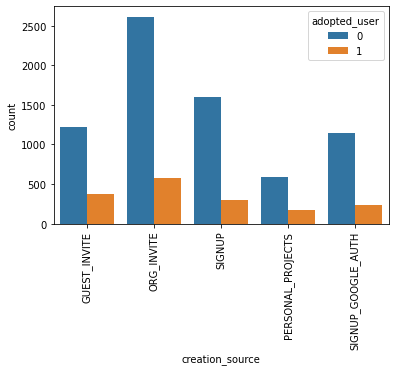

In [72]:
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

The creation source might be an explanation to adopted users. I should perform some hypothesis testing here

In [95]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['creation_source'], data['adopted_user'])
results = chi2_contingency(crosstab)
print(f"Chi2 = {results[0]} \np = {results[1]}")

Chi2 = 41.27933208242451 
p = 2.3526508745340972e-08


Seems significant, I'll create dummies for classification since these are object types.

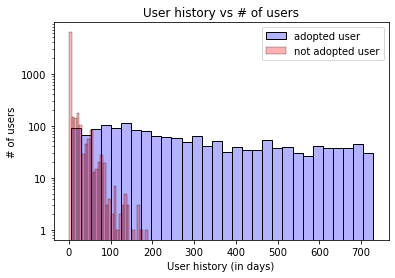

In [86]:
_ = sns.histplot(data=data.loc[data.adopted_user==1, 'history'], 
                 bins=30, color='b', label='adopted user',
                 alpha=0.3)
_ = sns.histplot(data=data.loc[data.adopted_user==0, 'history'], 
                 bins=30, color='r', label='not adopted user',
                 alpha=0.3)
_ = plt.yscale('log')
_ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
_ = plt.ylabel('# of users')
_ = plt.xlabel('User history (in days)')
_ = plt.legend()
_ = plt.title('User history vs # of users')

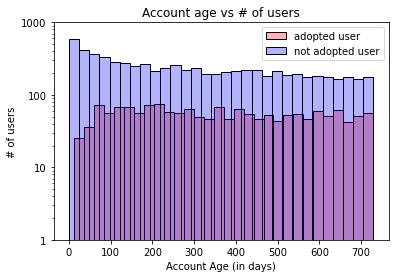

In [87]:
_ = sns.histplot(data=data.loc[data.adopted_user==1, 'account_age'], 
                 bins=30, color='r', label='adopted user', alpha=0.3)
_ = sns.histplot(data=data.loc[data.adopted_user==0, 'account_age'], 
                 bins=30, color='b', label='not adopted user', alpha=0.3)
_ = plt.yscale('log')
_ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
_ = plt.ylabel('# of users')
_ = plt.xlabel('Account Age (in days)')
_ = plt.legend()
_ = plt.title('Account age vs # of users')

## EDA Findings:

    1. creation source shows statistical significance
    2. Charts of the user history tells a story of one where longer history means adoption
    3. charts of accoutn age doesn't tell the same history as user history

When I tried modelling, there were some NaNs in dataset, must handle that!

In [103]:
data.isnull().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
history                          0
account_age                      0
adopted_user                     0
dtype: int64

In [104]:
data = data.replace(np.nan, 0)
data.isnull().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
history                       0
account_age                   0
adopted_user                  0
dtype: int64

# Modeling 

In [105]:
#since the chi2 showed some significance for the creation source,
#and since they are object types, I'll create dummies
creation_source = pd.get_dummies(data['creation_source'], 
                                 drop_first=True)

#joining dummies with data, and dropping original creation_source
model_data=pd.concat([data, creation_source], 
                     axis=1).drop('creation_source', axis=1)

#creating independent and dependent 
y=model_data['adopted_user']
X=model_data.drop('adopted_user', axis=1)

#should I be worried about scales for account age and history? 
#Ask mentor. Maybe not if I use random forest

#partitioning
from sklearn.model_selection import train_test_split
#note, from documentation - 
#stratify contains the same % of samples from the complete set
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                stratify=y,
                                                random_state=42)

In [106]:
#RF
#note to myself - must specify balanced class weights to account for non-scaled data?

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42, class_weight='balanced')

#Tune using CV
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print(f"Best parameters were: {model.best_params_} \n Best Average Precision was: {model.best_score_}")

Best parameters were: {'n_estimators': 200} 
 Best Average Precision was: 0.9635784961853154


In [107]:
#eval model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(random_state=42, 
                               class_weight='balanced', 
                               n_estimators=200)
model.fit(Xtrain, ytrain)
ypred=model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9592021758839528
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1792
           1       0.91      0.86      0.89       414

    accuracy                           0.96      2206
   macro avg       0.94      0.92      0.93      2206
weighted avg       0.96      0.96      0.96      2206



In [108]:
#which features were the most important?
importance = pd.Series(model.feature_importances_, index=X.columns)
importance=importance.sort_values(ascending=False)
print(importance)

history                       0.856325
account_age                   0.060883
org_id                        0.043210
invited_by_user_id            0.022555
opted_in_to_mailing_list      0.003603
enabled_for_marketing_drip    0.003284
ORG_INVITE                    0.002906
SIGNUP                        0.002763
SIGNUP_GOOGLE_AUTH            0.002364
PERSONAL_PROJECTS             0.002106
dtype: float64


# Analysis and Recommendations:
The three most important features are:

    1. History - how long they use the software
    2. Creation source (add the 4 up!)
        A. Guest invitation (just 'signup') and Personal_projects with highest adoption rate
    3. Account age
    
 Recommendations:
 
 From those three important features, really we can affect adoption by:
 
     1. History - encourage logins and use
     2. Encouraging using the software for personal projects
     3. Incentivising the sharing of invitation lists to friends 